## In any of packages are missing, use syntax below 
#### to install scipy
##### !pip install scipy

In [1]:
# not all packages are used in this example. They are imported here for convinience to be used in future examples
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mplt
import pandas as pd
import numpy as np
import plotly.express as px
import plotly as ppx
import scipy as scp
from scipy.stats import norm

import warnings
import sys

warnings.filterwarnings('ignore')
sns.set(style="darkgrid")

In [2]:

print("seaborn",sns.__version__)
print("pandas",pd.__version__)
print("matplotlib",mplt.__version__)
print("seaborn",sns.__version__)
print("matplotlib",mplt.__version__)
print("plotly",ppx.__version__)
print("numpy",np.__version__)
print("scipy",scp.__version__)

print("\n")
print("python",sys.version)
print("\n")

seaborn 0.13.2
pandas 2.2.2
matplotlib 3.9.1.post1
seaborn 0.13.2
matplotlib 3.9.1.post1
plotly 5.23.0
numpy 2.0.1
scipy 1.14.0


python 3.11.9 | packaged by conda-forge | (main, Apr 19 2024, 18:27:10) [MSC v.1938 64 bit (AMD64)]




### Black-Scholes Formula

In [3]:
def BS_Call_E(S, K, T, r, sig):
    d1 = (np.log(S/K) + (r + 0.5 * sig**2)*T) / (sig*np.sqrt(T))
    d2 = d1 - sig * np.sqrt(T)
    return (S * norm.cdf(d1) - K * np.exp(-r*T) * norm.cdf(d2))

### initalise values

In [4]:
S=100
K=100
r=0.07
sig=0.25
T=1

N = 100;

print("Black Scholes European Call Value - ", np.round(BS_Call_E(S, K, T, r, sig),6))


Black Scholes European Call Value -  13.363881


### initalise arrays

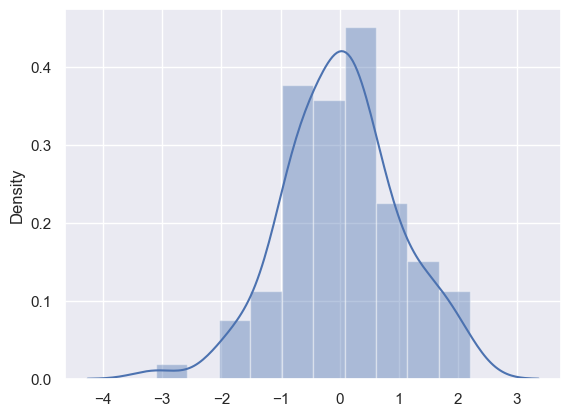

In [5]:
Y = np.random.normal(loc=0.0, scale=1.0, size=N)
Z = []
Z = [0 for i in range(N)]
V = []
V = [0 for i in range(N)]
VV = []
VV = [0 for i in range(N)]
W = []
W = [0 for i in range(N)]



# plotting histogram for carat using distplot()
sns.distplot(a=Y, kde=True)

# visualizing plot using matplotlib.pyplot library
plt.show()

### Main loop


#### pay attention to use of maximum

In [6]:
for k in range(N):
    Z[k] = S * np.exp((r-0.5 * sig*sig)*T + sig * np.sqrt(T)*Y[k])
    V[k] = S * np.exp((r-0.5 * sig*sig)*T - sig * np.sqrt(T)*Y[k])
    W[k] = 0.5 * (np.maximum(Z[k]-K,0) + np.maximum(V[k]-K,0))
    VV[k] =np.maximum(V[k]-K,0)
    
price_BS_CALL_E = np.exp(-r*T) * sum(W)/ N
#price_BS_CALL_E = np.exp(-r*T) * sum(V)/ N


print("Antithetic price - ", np.round(price_BS_CALL_E,6))

print("Non antithetic price - ",np.round(np.exp(-r*T) * sum(VV)/ N,6))



Antithetic price -  12.587719
Non antithetic price -  12.184622


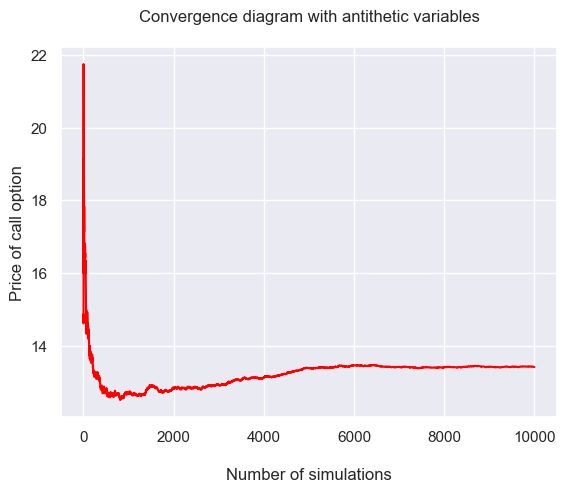

In [30]:


U = []
U = [0 for i in range(N)]

U[0] = W[0]

for k in range(1,N):
    U[k] = U[k-1] + W[k]


for k in range(N):
    U[k] = np.exp(-r*T) * U[k] / k



plt.plot(range(N), U, color='red')

plt.xlabel('\nNumber of simulations')
plt.ylabel('Price of call option')
plt.title('Convergence diagram with antithetic variables\n')

plt.show()




